# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [80]:
# Prepare the Data
# Run the provided package dependency and data imports, and then merge the mouse_metadata and study_results DataFrames 
# into a single DataFrame.
# Display the number of unique mice IDs in the data, and then check for any mouse ID with duplicate time points. 
# Display the data associated with that mouse ID, and then create a new DataFrame where this data is removed. 
# Use this cleaned DataFrame for the remaining steps.
# Display the updated number of unique mice IDs.

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [82]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [83]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [84]:
# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how="right", on="Mouse ID")

In [85]:
# Display the data table for preview
# Re-arrange the columns
combined_data_df = combined_data_df.loc[:,["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [86]:
# Checking the number of mice.
combined_data_df["Mouse ID"].nunique()

249

In [87]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_timepoint = combined_data_df[["Mouse ID", "Timepoint"]].value_counts()

# To make the value counts as part of a dataframe I saved the output to a csv file
duplicated_timepoint.to_csv("duplicate.csv")

# Read the duplicate.csv file into a dataframe
duplicated_timepoint_df = pd.read_csv("duplicate.csv")

# Rename the third column "0" to Duplicates
duplicated_timepoint_df = duplicated_timepoint_df.rename(columns = {"0":"Duplicates"})

# Get the Mouse ID that have duplicate Timepoints
duplicated_timepoint_df.loc[duplicated_timepoint_df["Duplicates"] > 1]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [88]:
# Since we have now the Mouse ID with duplicated Timepoints. Let us now identify all row related to the Mouse ID
# Optional: Get all the data for the duplicate mouse ID. 
combined_data_df.loc[combined_data_df["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [89]:
# To drop the rows with "g989", I have to set the index to Mouse ID
combined_data_df = combined_data_df.set_index("Mouse ID")

# Drop the rows with "g989"
clean_combined_data_df = combined_data_df.drop(index=('g989'))

# Reset the index to have the desired output
clean_combined_data_df = clean_combined_data_df.reset_index()

# Sample the output
clean_combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [90]:
# Checking the number of mice in the clean DataFrame.
clean_combined_data_df["Mouse ID"].nunique()

248

## Summary Statistics

In [91]:
# Generate Summary Statistics
# Create a DataFrame of summary statistics. Remember, there is more than one method to produce the results you're after, 
# so the method you use is less important than the result.

# Your summary statistics should include:
# A row for each drug regimen. These regimen names should be contained in the index column.
# A column for each of the following statistics: mean, median, variance, standard deviation, and SEM of the tumor volume.

In [92]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

In [93]:
clean_combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [94]:
# Get the dataframe for the mean of tumor volume
mean_tumor_volume_df = pd.DataFrame(clean_combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())

# Rename "Tumor Volume (mm3)" to "Mean Tumor Volume"
mean_tumor_volume_df = mean_tumor_volume_df.rename(columns = {"Tumor Volume (mm3)":"Mean Tumor Volume"})
mean_tumor_volume_df

,Mean Tumor Volume
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [95]:
# Get the dataframe for the median of tumor volume
median_tumor_volume_df = pd.DataFrame(clean_combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())

# Rename "Tumor Volume (mm3)" to "Median Tumor Volume"
median_tumor_volume_df = median_tumor_volume_df.rename(columns = {"Tumor Volume (mm3)":"Median Tumor Volume"})
median_tumor_volume_df

,Median Tumor Volume
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.446266
Ramicane,40.673236
Stelasyn,52.431737


In [96]:
# Get the dataframe for the variance of tumor volume
variance_tumor_volume_df = pd.DataFrame(clean_combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())

# Rename "Tumor Volume (mm3)" to "Tumor Volume Variance"
variance_tumor_volume_df = variance_tumor_volume_df.rename(columns = {"Tumor Volume (mm3)":"Tumor Volume Variance"})
variance_tumor_volume_df

,Tumor Volume Variance
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


In [97]:
# Get the dataframe for the standard deviation of tumor volume
std_tumor_volume_df = pd.DataFrame(clean_combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())

# Rename "Tumor Volume (mm3)" to "Tumor Volume Std. Dev."
std_tumor_volume_df = std_tumor_volume_df.rename(columns = {"Tumor Volume (mm3)":"Tumor Volume Std. Dev."})
std_tumor_volume_df

,Tumor Volume Std. Dev.
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.622085
Ramicane,4.846308
Stelasyn,7.710419


In [98]:
# Get the dataframe for the SEM of tumor volume
sem_tumor_volume_df = pd.DataFrame(clean_combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

# Rename "Tumor Volume (mm3)" to "Tumor Volume Std. Err."
sem_tumor_volume_df = sem_tumor_volume_df.rename(columns = {"Tumor Volume (mm3)":"Tumor Volume Std. Err."})
sem_tumor_volume_df

,Tumor Volume Std. Err.
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [99]:
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_df = pd.concat([mean_tumor_volume_df, 
                             median_tumor_volume_df, 
                             variance_tumor_volume_df, 
                             std_tumor_volume_df, 
                             sem_tumor_volume_df], axis=1)
drug_regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [100]:
# Create Bar Charts and Pie Charts
# Generate two bar charts. Both charts should be identical and show the total number of time points for all mice tested 
# for each drug regimen throughout the study.

# Create the first bar chart with the Pandas DataFrame.plot() method.
# Create the second bar chart with Matplotlib's pyplot methods.
# Generate two pie charts. Both charts should be identical and show the distribution of female versus male mice in the study.
# Create the first pie chart with the Pandas DataFrame.plot() method.
# Create the second pie chart with Matplotlib's pyplot methods.

In [101]:
clean_combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [102]:
# Create the dataframe for the bar chart
chart_df = pd.DataFrame(clean_combined_data_df.groupby("Drug Regimen")["Mouse ID"].count())
chart_df = chart_df.reset_index()
chart_df = chart_df.rename(columns={"Mouse ID":"Number of Mice Tested"})
chart_df = chart_df.sort_values("Number of Mice Tested", ascending=False)
chart_df

,Drug Regimen,Number of Mice Tested
0,Capomulin,230
7,Ramicane,228
3,Ketapril,188
4,Naftisol,186
9,Zoniferol,182
5,Placebo,181
8,Stelasyn,181
1,Ceftamin,178
2,Infubinol,178
6,Propriva,148


<AxesSubplot: xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

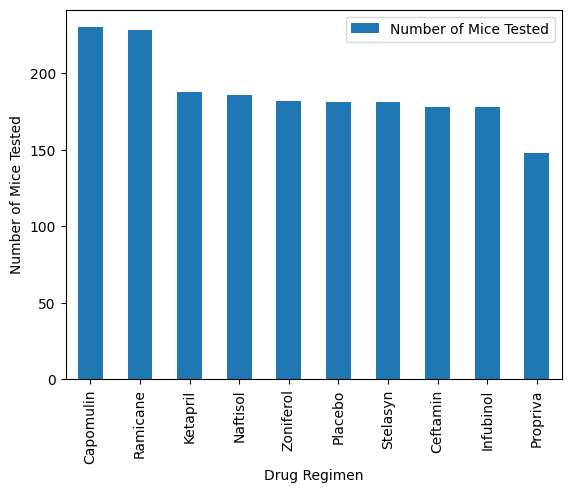

In [103]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_chart_df = chart_df.set_index("Drug Regimen")
bar_chart_df.plot(kind="bar", xlabel="Drug Regimen", ylabel="Number of Mice Tested")

<BarContainer object of 10 artists>

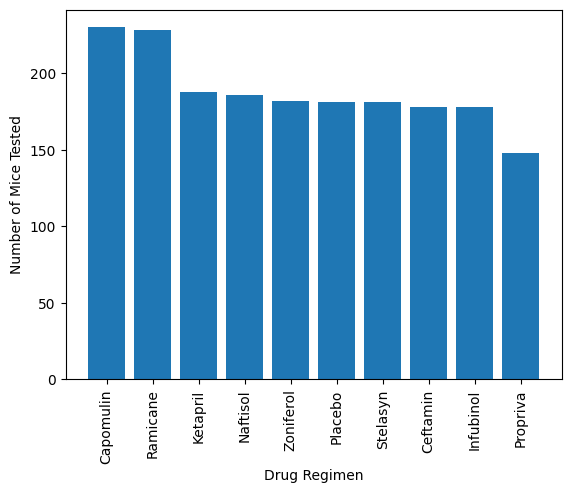

In [104]:
# Reset the index to make the "Drug Regimen" as another column in a dataframe
bar_chart_df = bar_chart_df.reset_index()

# Create the list for drug regimen and number of mice tested
drug_regimen_list = bar_chart_df["Drug Regimen"]
number_of_mice_tested_list = bar_chart_df["Number of Mice Tested"]

# Get the tick locations
x_axis = np.arange(0, len(drug_regimen_list))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(tick_locations, drug_regimen_list, rotation="vertical")
plt.bar(drug_regimen_list, number_of_mice_tested_list)

In [105]:
# Recall the dataframe that shows all the information
clean_combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [106]:
# Get the number of mice
number_of_mice = len(clean_combined_data_df["Sex"])
number_of_mice

1880

In [107]:
# Put in a dataframe the number of male and female mice
sex_number_of_mice_df = pd.DataFrame(clean_combined_data_df["Sex"].value_counts())
sex_number_of_mice_df

,Sex
Male,958
Female,922


In [108]:
# Get the number of male and female mice
number_of_males = sex_number_of_mice_df.iloc[0]
number_of_females = sex_number_of_mice_df.iloc[1]
number_of_males, number_of_females

(Sex    958
 Name: Male, dtype: int64,
 Sex    922
 Name: Female, dtype: int64)

In [109]:
# Get the percent for both male and female mice
percent_male_mice = round((number_of_males/number_of_mice)*100)
percent_female_mice = round((number_of_females/number_of_mice)*100)
percent_male_mice, percent_female_mice

(Sex    51.0
 Name: Male, dtype: float64,
 Sex    49.0
 Name: Female, dtype: float64)

In [110]:
# Put the values into a dataframe
distribution_df = pd.DataFrame({
    "Male":percent_male_mice,
    "Female":percent_female_mice
})
distribution_df = pd.DataFrame(distribution_df.loc["Sex"])
distribution_df

,Sex
Male,51.0
Female,49.0


<AxesSubplot: ylabel='Sex'>

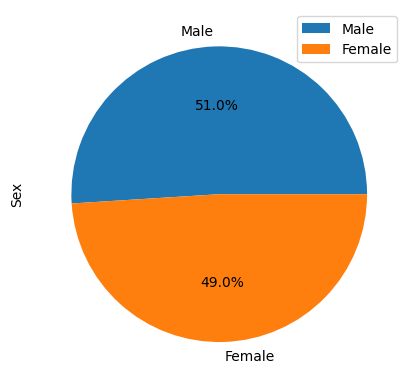

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
distribution_df.plot(kind="pie", y="Sex", autopct="%1.1f%%")

Text(0, 0.5, 'Sex')

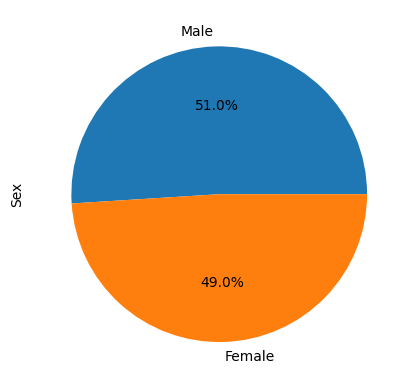

In [112]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = distribution_df.index
plt.pie(distribution_df["Sex"], labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [113]:
# Calculate Quartiles, Find Outliers, and Create a Box Plot
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin. Then, calculate the quartiles and IQR, and determine if there are any 
# potential outliers across all four treatment regimens. Use the following substeps:
    # Create a grouped DataFrame that shows the last (greatest) time point for each mouse. Merge this grouped DataFrame with the original cleaned DataFrame.
    # Create a list that holds the treatment names as well as a second, empty list to hold the tumor volume data.
    # Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. Append the resulting final tumor volumes for each drug to the empty list.
    # Determine outliers by using the upper and lower bounds, and then print the results.

# Using Matplotlib, generate a box plot that shows the distribution of the final tumor volume for all the mice in 
# each treatment group. Highlight any potential outliers in the plot by changing their color and style.

# hint: All four box plots should be within the same figure. Use this Matplotlib documentation page 
# Links to an external site.for help with changing the style of the outliers.

In [114]:
# Recall the dataframe that shows all the information
clean_combined_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [115]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# list all the unique drug regimen in order know which drug regimen to drop
clean_combined_data_df["Drug Regimen"].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [116]:
# Trim the clean_combined_data_df dataframe to show only treatment regimen for Capomulin, Ramicane, Infubinol, and Ceftamin

# set the drug regimen as index
top_drug_regimen_df = clean_combined_data_df.set_index("Drug Regimen")
top_drug_regimen_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.000000,0,Female,9,22
Ketapril,f932,0,45.000000,0,Male,15,29
Ketapril,g107,0,45.000000,0,Female,2,29
Ketapril,a457,0,45.000000,0,Female,11,30
Ketapril,c819,0,45.000000,0,Male,21,25
...,...,...,...,...,...,...,...
Capomulin,r944,45,41.581521,2,Male,12,25
Capomulin,u364,45,31.023923,3,Male,18,17
Ceftamin,p438,45,61.433892,1,Female,11,26


In [117]:
# Drug regimen to keep: Capomulin, Ramicane, Infubinol, and Ceftamin
# Drug regimen to drop: Naftisol, Placebo, Ketapril, Zoniferol, Stelasyn, and Propriva
final_drug_regimen_df = top_drug_regimen_df.drop(["Naftisol", "Placebo", "Ketapril", "Zoniferol", "Stelasyn", "Propriva"])
final_drug_regimen_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.000000,0,Female,9,22
Infubinol,c326,0,45.000000,0,Female,18,25
Infubinol,c139,0,45.000000,0,Male,11,28
Infubinol,v339,0,45.000000,0,Male,20,26
Infubinol,a577,0,45.000000,0,Female,6,25
...,...,...,...,...,...,...,...
Ramicane,a644,45,32.978522,1,Female,7,17
Ramicane,i177,45,33.562402,3,Male,10,18
Capomulin,r944,45,41.581521,2,Male,12,25


In [118]:
# Reset the index to make the drug regimen as a column
final_drug_regimen_df = final_drug_regimen_df.reset_index()
final_drug_regimen_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,0,45.000000,0,Female,9,22
1,Infubinol,c326,0,45.000000,0,Female,18,25
2,Infubinol,c139,0,45.000000,0,Male,11,28
3,Infubinol,v339,0,45.000000,0,Male,20,26
4,Infubinol,a577,0,45.000000,0,Female,6,25
...,...,...,...,...,...,...,...,...
809,Ramicane,a644,45,32.978522,1,Female,7,17
810,Ramicane,i177,45,33.562402,3,Male,10,18
811,Capomulin,r944,45,41.581521,2,Male,12,25
812,Capomulin,u364,45,31.023923,3,Male,18,17


In [119]:
# Sort final_drug_regimen_df dataframe on mouse id and timepoint
final_drug_regimen_df = final_drug_regimen_df.sort_values(by=["Mouse ID", "Timepoint"])
final_drug_regimen_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
39,Infubinol,a203,0,45.000000,0,Female,20,23
141,Infubinol,a203,5,48.508468,0,Female,20,23
244,Infubinol,a203,10,51.852437,1,Female,20,23
312,Infubinol,a203,15,52.777870,1,Female,20,23
423,Infubinol,a203,20,55.173336,1,Female,20,23
...,...,...,...,...,...,...,...,...
536,Infubinol,z581,25,54.316407,2,Female,24,25
556,Infubinol,z581,30,56.286750,2,Female,24,25
629,Infubinol,z581,35,58.628399,3,Female,24,25
735,Infubinol,z581,40,60.053740,3,Female,24,25


In [129]:
# Create a grouped DataFrame that shows the last (greatest) time point for each mouse. 
last_timepoint_df = pd.DataFrame(final_drug_regimen_df.groupby("Mouse ID")["Timepoint"].last())
last_timepoint_df = last_timepoint_df.reset_index()
# last_timepoint_df = last_timepoint_df.rename(columns={"Timepoint":"Last_timepoint"})
last_timepoint_df
# last_timepoint_df.to_csv("last_timepoint_df.csv")

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [137]:
# Merge this grouped DataFrame with the original cleaned DataFrame.
merged_drug_regimen_df = pd.merge(last_timepoint_df, final_drug_regimen_df)
merged_drug_regimen_df

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a203,45,Infubinol,67.973419,2,Female,20,23
1,a251,45,Infubinol,65.525743,1,Female,21,25
2,a275,45,Ceftamin,62.999356,3,Female,20,28
3,a411,45,Ramicane,38.407618,1,Male,3,22
4,a444,45,Ramicane,43.047543,0,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,68.594745,4,Female,6,27
96,y793,45,Capomulin,31.896238,2,Male,17,17
97,y865,45,Ceftamin,64.729837,3,Male,23,26
98,z578,45,Ramicane,30.638696,0,Male,11,16


In [138]:
merged_drug_regimen_df.to_csv("merged_drug_regimen_df.csv")

In [ ]:
# incident_time_df.groupby(["Incident City"]).mean().head(10)
# get_budget_per_school = school_data_complete.groupby(by="school_name")["budget"].unique()
# df.groupby('Col1')['Col2'].last()

In [ ]:
# type_summary = pd.merge(average_math_score_by_type, average_reading_score_by_type, on="School Type")

In [269]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

# Get only the 45th day values which should indicate the final tumor volume for each mouse across all treatments
final_tumor_volume_df = clean_combined_data_df[(clean_combined_data_df["Timepoint"] == 45)]
final_tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1750,n364,45,31.095335,1,Ramicane,Male,4,17
1751,b128,45,38.982878,2,Capomulin,Female,9,22
1752,l661,45,59.851956,3,Ceftamin,Male,18,26
1753,y865,45,64.729837,3,Ceftamin,Male,23,26
1754,y769,45,68.594745,4,Ceftamin,Female,6,27
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [270]:
# list all the unique drug regimen in order know which to drug regimen to drop
final_tumor_volume_df["Drug Regimen"].unique()

# Drug regimen to keep: Capomulin, Ramicane, Infubinol, and Ceftamin
# Drug regimen to drop: Naftisol, Placebo, Ketapril, Zoniferol, Stelasyn, and Propriva

array(['Ramicane', 'Capomulin', 'Ceftamin', 'Naftisol', 'Placebo',
       'Ketapril', 'Infubinol', 'Zoniferol', 'Stelasyn', 'Propriva'],
      dtype=object)

In [271]:
# set the drug regimen as index
top_drug_regimen_df = final_tumor_volume_df.set_index("Drug Regimen")
top_drug_regimen_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Ramicane,n364,45,31.095335,1,Male,4,17
Capomulin,b128,45,38.982878,2,Female,9,22
Ceftamin,l661,45,59.851956,3,Male,18,26
Ceftamin,y865,45,64.729837,3,Male,23,26
Ceftamin,y769,45,68.594745,4,Female,6,27
...,...,...,...,...,...,...,...
Capomulin,r944,45,41.581521,2,Male,12,25
Capomulin,u364,45,31.023923,3,Male,18,17
Ceftamin,p438,45,61.433892,1,Female,11,26


In [272]:
# Drop the drug regimen that are not needed
# Drug regimen to keep: Capomulin, Ramicane, Infubinol, and Ceftamin
# Drug regimen to drop: Naftisol, Placebo, Ketapril, Zoniferol, Stelasyn, and Propriva
final_drug_regimen_df = top_drug_regimen_df.drop(["Naftisol", "Placebo", "Ketapril", "Zoniferol", "Stelasyn", "Propriva"])
final_drug_regimen_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Ramicane,n364,45,31.095335,1,Male,4,17
Capomulin,b128,45,38.982878,2,Female,9,22
Ceftamin,l661,45,59.851956,3,Male,18,26
Ceftamin,y865,45,64.729837,3,Male,23,26
Ceftamin,y769,45,68.594745,4,Female,6,27
...,...,...,...,...,...,...,...
Ramicane,a644,45,32.978522,1,Female,7,17
Ramicane,i177,45,33.562402,3,Male,10,18
Capomulin,r944,45,41.581521,2,Male,12,25


In [273]:
# Reset the index to make the drug regimen a column again
final_drug_regimen_df = final_drug_regimen_df.reset_index()
final_drug_regimen_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Ramicane,n364,45,31.095335,1,Male,4,17
1,Capomulin,b128,45,38.982878,2,Female,9,22
2,Ceftamin,l661,45,59.851956,3,Male,18,26
3,Ceftamin,y865,45,64.729837,3,Male,23,26
4,Ceftamin,y769,45,68.594745,4,Female,6,27
...,...,...,...,...,...,...,...,...
58,Ramicane,a644,45,32.978522,1,Female,7,17
59,Ramicane,i177,45,33.562402,3,Male,10,18
60,Capomulin,r944,45,41.581521,2,Male,12,25
61,Capomulin,u364,45,31.023923,3,Male,18,17


In [274]:
# Verify only the drug regimen we want is in the dataframe
final_drug_regimen_df["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol'], dtype=object)

In [275]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [276]:
# Put treatments into a list for for loop (and later for plot labels)
list_of_treatments = final_drug_regimen_df["Drug Regimen"].unique()
list_of_treatments

array(['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol'], dtype=object)

In [277]:
# Create empty list to fill with tumor vol data (for plotting)
for x in list_of_treatments:
    if x == "Capomulin":
        # Get the list of tumor volume for Capomulin
        capomulin_df = final_drug_regimen_df[(final_drug_regimen_df["Drug Regimen"] == x)]
        tumor_volume_capomulin_data = capomulin_df["Tumor Volume (mm3)"]
        # Calculate the IQR and quantitatively determine if there are any potential outliers.
        capomulin_quartiles = tumor_volume_capomulin_data.quantile([.25,.5,.75])
        capomulin_lowerq = capomulin_quartiles[0.25]
        capomulin_upperq = capomulin_quartiles[0.75]
        capomulin_iqr = capomulin_upperq-capomulin_lowerq
        capomulin_lower_bound = capomulin_lowerq - (capomulin_iqr * 1.5)
        capomulin_upper_bound = capomulin_upperq + (capomulin_iqr * 1.5)
    if x == "Ceftamin":
        # Get the list of tumor volume for Ceftamin
        ceftamin_df = final_drug_regimen_df[(final_drug_regimen_df["Drug Regimen"] == x)]
        tumor_volume_ceftamin_data = ceftamin_df["Tumor Volume (mm3)"]
        # Calculate the IQR and quantitatively determine if there are any potential outliers.
        ceftamin_quartiles = tumor_volume_ceftamin_data.quantile([.25,.5,.75])
        ceftamin_lowerq = ceftamin_quartiles[0.25]
        ceftamin_upperq = ceftamin_quartiles[0.75]
        ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
        ceftamin_lower_bound = ceftamin_lowerq - (ceftamin_iqr * 1.5)
        ceftamin_upper_bound = ceftamin_upperq + (ceftamin_iqr * 1.5)
    if x == "Infubinol":
        # Get the list of tumor volume for Ceftamin
        infubinol_df = final_drug_regimen_df[(final_drug_regimen_df["Drug Regimen"] == x)]
        tumor_volume_infubinol_data = infubinol_df["Tumor Volume (mm3)"]
        # Calculate the IQR and quantitatively determine if there are any potential outliers.
        infubinol_quartiles = tumor_volume_infubinol_data.quantile([.25,.5,.75])
        infubinol_lowerq = infubinol_quartiles[0.25]
        infubinol_upperq = infubinol_quartiles[0.75]
        infubinol_iqr = infubinol_upperq-infubinol_lowerq
        infubinol_lower_bound = infubinol_lowerq - (infubinol_iqr * 1.5)
        infubinol_upper_bound = infubinol_upperq + (infubinol_iqr * 1.5)
    if x == "Ramicane":
        # Get the list of tumor volume for Ramicane
        ramicane_df = final_drug_regimen_df[(final_drug_regimen_df["Drug Regimen"] == x)]
        tumor_volume_ramicane_data = ramicane_df["Tumor Volume (mm3)"]
        # Calculate the IQR and quantitatively determine if there are any potential outliers.
        ramicane_quartiles = tumor_volume_ramicane_data.quantile([.25,.5,.75])
        ramicane_lowerq = ramicane_quartiles[0.25]
        ramicane_upperq = ramicane_quartiles[0.75]
        ramicane_iqr = ramicane_upperq-ramicane_lowerq
        ramicane_lower_bound = ramicane_lowerq - (ramicane_iqr * 1.5)
        ramicane_upper_bound = ramicane_upperq + (ramicane_iqr * 1.5)

print(f"Capomulin's potential outliers (lower_bound, upper_bound): {capomulin_lower_bound, capomulin_upper_bound}")
print(f"Ceftamin's potential outliers (lower_bound, upper_bound): {ceftamin_lower_bound, ceftamin_upper_bound}")
print(f"Infubinol's potential outliers (lower_bound, upper_bound): {infubinol_lower_bound, infubinol_upper_bound}")
print(f"Ramicane's potential outliers (lower_bound, upper_bound): {ramicane_lower_bound, ramicane_upper_bound}")

Capomulin's potential outliers (lower_bound, upper_bound): (20.70456164999999, 51.83201549)
Ceftamin's potential outliers (lower_bound, upper_bound): (52.29350701999999, 76.66786758)
Infubinol's potential outliers (lower_bound, upper_bound): (55.35777559500001, 75.08224443499999)
Ramicane's potential outliers (lower_bound, upper_bound): (19.69048010125, 49.79900043125001)


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


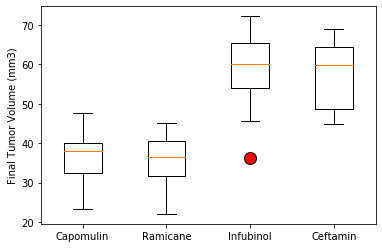

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

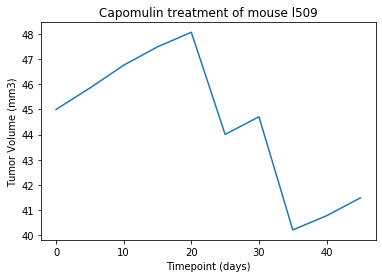

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



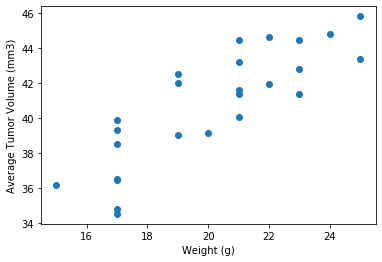

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


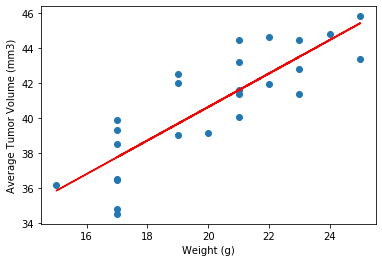

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

